<a href="https://colab.research.google.com/github/Fatimainda/EstadisticaVerano/blob/main/Practice02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



PUNTO 2:GRAFICO DE DISPERSION


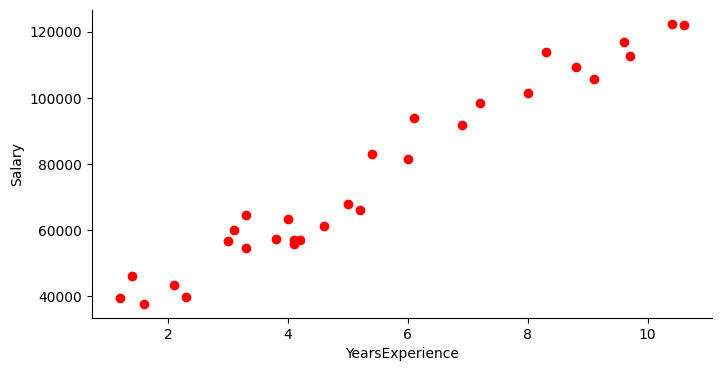



PUNTO 3: DATOS SOPORTAN LA SUPOSICION DE LINEALIDAD
Si soportan la suposicion de linealidad debido a que los puntos parecen seguir una secuencia


PUNTO 4:COEFICIENTE DE CORRELACION
Coeficiente de correlación:  0.9782

PUNTO 6:RECTA DE REGRESION AJUSTADA


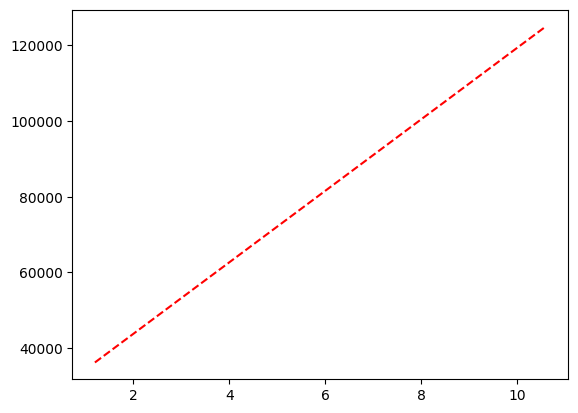



PUNTO 5:COEFICIENTE DE DETERMINACION
Coeficiente de determinación:  0.9570



PUNTO 7: INTERVALO DE CONFIANZA
Intervalo de confianza para b1 de  95%
 8674.1187 < b1 <  10225.8059



PUNTO 8:RESIDUALES Y GRAFICO DE DISPERSION




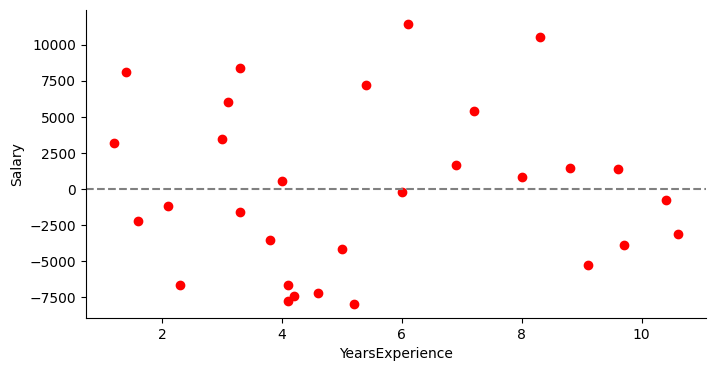



PUNTO 9: PRUEBA DE SHAPIRO
valor-p para shapiro:  0.1952
No se rechaza la hipótesis nula, los residuales siguen una distribución normal


PUNTO 10: PRUEBA DE BREUCH-PAGAN
valor_p de Breusch-Pagan:  0.5276

No se rechaza la hipótesis nula, no hay heteroscedasticidad


PUNTO 11: RECTA DE REGRESIÓN
Para x = 4, y = [62648.05325234]
Para x = 8, y = [100447.90253816]
Para x = 20, y = [213847.45039562]



PUNTO 12: TABLA ANOVA
                   df        sum_sq       mean_sq           F        PR(>F)
YearsExperience   1.0  2.085685e+10  2.085685e+10  622.507203  1.143068e-20
Residual         28.0  9.381286e+08  3.350459e+07         NaN           NaN
Se rechaza la Ho, por lo tanto b1 es diferente a 0


RESUMEN DEL PROBLEMA.
Soporta la suposicion de linealidad
Normalidad en los residuales
Relacion fuerte entre X y Y=0.97
Hay homoscedasticidad--breuch
El mdodelo es confiable para interpolacion


           mean      mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  62648.053252  1184.

In [3]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Fatimainda/EstadisticaVerano/refs/heads/main/Salary_dataset.csv")
df
x=df["YearsExperience"]
y=df["Salary"]

print("\n")
print("PUNTO 2:GRAFICO DE DISPERSION")
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 4), dpi = 100)
plt.scatter(x, y, label = "ventas", color = 'red')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.gca().spines[["top","right"]].set_visible(False)
plt.show()

print("\n")
print("PUNTO 3: DATOS SOPORTAN LA SUPOSICION DE LINEALIDAD")
print("Si soportan la suposicion de linealidad debido a que los puntos parecen seguir una secuencia")

print("\n")
print("PUNTO 4:COEFICIENTE DE CORRELACION")
from scipy.stats import pearsonr
r, _ = pearsonr(x, y)
print(f'Coeficiente de correlación: {r: 0.4f}\n')

print("PUNTO 6:RECTA DE REGRESION AJUSTADA")
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()
yc = modelo.predict(x_constante)
plt.plot(x, yc, color = 'red', linestyle = '--')
plt.show()

print("\n")
print("PUNTO 5:COEFICIENTE DE DETERMINACION")
from sklearn.metrics import r2_score
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')

print("\n")
print("PUNTO 7: INTERVALO DE CONFIANZA")
nivel_de_confianza = 0.95
intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f'Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n')

print("\n")
print("PUNTO 8:RESIDUALES Y GRAFICO DE DISPERSION")
plt.figure(figsize = (8, 4), dpi = 100)
residuales = y - yc
plt.scatter(x, residuales, color = 'red')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.axhline(y = 0, color = 'gray', linestyle = '--')
plt.gca().spines[["top","right"]].set_visible(False)
print("\n")
plt.show()

print("\n")
print("PUNTO 9: PRUEBA DE SHAPIRO")
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p para shapiro: {valor_p_sh: 0.4f}')
print("No se rechaza la hipótesis nula, los residuales siguen una distribución normal")

print("\n")
print("PUNTO 10: PRUEBA DE BREUCH-PAGAN")
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')
print("No se rechaza la hipótesis nula, no hay heteroscedasticidad")

print("\n")
print("PUNTO 11: RECTA DE REGRESIÓN")
print(f'Para x = 4, y = {modelo.predict([1, 4])}')
print(f'Para x = 8, y = {modelo.predict([1, 8])}')
print(f'Para x = 20, y = {modelo.predict([1, 20])}\n')

print("\n")
print("PUNTO 12: TABLA ANOVA")
from statsmodels.formula.api import ols
modelo_lineal = ols('Salary ~ YearsExperience', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
print(tabla_anova)
print("Se rechaza la Ho, por lo tanto b1 es diferente a 0")

print("\n")
plt.show()
print("RESUMEN DEL PROBLEMA.")
print("Soporta la suposicion de linealidad")
print("Normalidad en los residuales")
print("Relacion fuerte entre X y Y=0.97")
print("Hay homoscedasticidad--breuch")
print("El mdodelo es confiable para interpolacion")

print("\n")
print(modelo.get_prediction([1,4]).summary_frame(alpha=0.05))